Epoch 1/100
8/8 [==============================] - 1s 100ms/step - loss: 1.7932 - accuracy: 0.1481 - val_loss: 1.7924 - val_accuracy: 0.1481
Epoch 2/100
8/8 [==============================] - 1s 68ms/step - loss: 1.7912 - accuracy: 0.1770 - val_loss: 1.7882 - val_accuracy: 0.1481
Epoch 3/100
8/8 [==============================] - 1s 72ms/step - loss: 1.7875 - accuracy: 0.1790 - val_loss: 1.7854 - val_accuracy: 0.1481
Epoch 4/100
8/8 [==============================] - 1s 68ms/step - loss: 1.7822 - accuracy: 0.2006 - val_loss: 1.7825 - val_accuracy: 0.1574
Epoch 5/100
8/8 [==============================] - 1s 75ms/step - loss: 1.7774 - accuracy: 0.2335 - val_loss: 1.7789 - val_accuracy: 0.1667
Epoch 6/100
8/8 [==============================] - 1s 71ms/step - loss: 1.7761 - accuracy: 0.2274 - val_loss: 1.7725 - val_accuracy: 0.2130
Epoch 7/100
8/8 [==============================] - 1s 74ms/step - loss: 1.7675 - accuracy: 0.2973 - val_loss: 1.7661 - val_accuracy: 0.3704
Epoch 8/100
8/8 [==

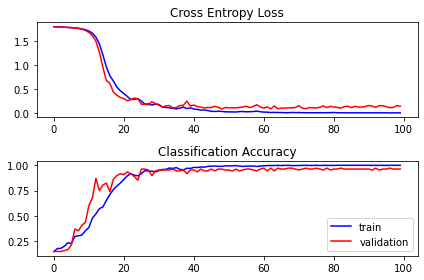

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00        17
           3       1.00      0.97      0.98        29
           4       0.95      0.95      0.95        19
           5       1.00      0.95      0.97        20
           6       1.00      1.00      1.00        19

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



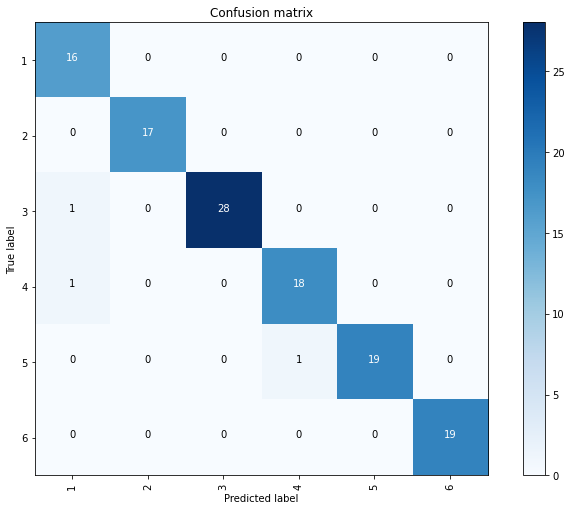

In [3]:
from numpy import mean
from numpy import std
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd
from sklearn.utils import shuffle
def load_dataset():
	df=pd.read_csv(r"C:\Users\prane\Desktop\2021_2022_2\ML\Assignment 1\CSV_datasetsix_vowel_dataset_with_class.csv")
	df=shuffle(df)
	pixels=[]
	for i in range(784):
		pixels.append('pixel'+str(i))
	features=pixels
	X=df.loc[:,features].values
	y=df.loc[:,'class'].values

	X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)
	trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
	testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
	y_train=y_train-1
	y_test=y_test-1
	trainY = to_categorical(y_train)
	testY = to_categorical(y_test)
	trainX,validX,trainY,validY = train_test_split(trainX,trainY,test_size=0.1,random_state=100)
	return trainX, trainY, testX, testY, validX, validY

# normalize
def prep_pixels(train, test, val):
	train_norm = train / 255.0
	test_norm = test / 255.0
	val_norm = val / 255.0
	return train_norm, test_norm, val_norm

def define_model():
	model = Sequential()
	image_size = 28
	model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(image_size, image_size, 1)))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Flatten())

	model.add(Dense(512, activation='relu'))              
	model.add(Dropout(0.5))
	model.add(Dense(6, activation='softmax'))

	optim = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 

def evaluate_model(trainX, trainY, valX, valY, testX, testY):
 scores, histories = list(), list()
 model = define_model()
 history = model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(valX, valY))
 _, acc = model.evaluate(testX, testY, verbose=0)
 y_pred = model.predict(testX)
 print('Test Accuracy:', (acc * 100), '%')
 return history, y_pred
 
# plot metrics
def plot_metrics(history):
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(history.history['loss'], color='blue', label='train')
		pyplot.plot(history.history['val_loss'], color='red', label='validation')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(history.history['accuracy'], color='blue', label='train')
		pyplot.plot(history.history['val_accuracy'], color='red', label='validation')
		pyplot.tight_layout()
		pyplot.legend()
		pyplot.show()
	
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=pyplot.cm.Blues):
		pyplot.figure(figsize = (10,7))
		pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
		pyplot.title(title)
		pyplot.colorbar()
		tick_marks = np.arange(len(classes))
		pyplot.xticks(tick_marks, classes, rotation=90)
		pyplot.yticks(tick_marks, classes)
		if normalize:
			cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
		thresh = cm.max() / 2.
		for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
			pyplot.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
		pyplot.tight_layout()
		pyplot.ylabel('True label')
		pyplot.xlabel('Predicted label')

 
class_labels = ['1','2','3','4','5','6']
trainX, trainY, testX, testY, validX, validY = load_dataset()
trainX, testX, validX = prep_pixels(trainX, testX, validX)
history, y_pred = evaluate_model(trainX, trainY, validX, validY, testX, testY)
y_pred_classes = np.argmax(y_pred,axis = 1)
testY_classes = np.argmax(testY,axis = 1) 
confmat = confusion_matrix(testY_classes, y_pred_classes)
plot_metrics(history)
print(classification_report(testY_classes, y_pred_classes, target_names = class_labels))
plot_confusion_matrix(confmat, classes = class_labels)

In [7]:
trainY

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [22]:
testY_classes = np.argmax(testY,axis = 1)
confusion_matrix(testY_classes,testY_classes)

array([[23,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0, 20]], dtype=int64)

In [23]:
trainY_classes = np.argmax(trainY,axis = 1)
confusion_matrix(trainY_classes,trainY_classes)

array([[161,   0,   0,   0,   0,   0],
       [  0, 154,   0,   0,   0,   0],
       [  0,   0, 165,   0,   0,   0],
       [  0,   0,   0, 166,   0,   0],
       [  0,   0,   0,   0, 164,   0],
       [  0,   0,   0,   0,   0, 162]], dtype=int64)